In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 11.2: The principle of maximum entropy for discrete random variables

## Objectives
+ Learn how to find the maximum entropy distribution for discrete random variables.

## The Brandeis Dice Problem
This is from the 1962 Brandeis lectures of E. T. Jaynes.

> When a die is tossed, the number of spots up can have any value $x$ in $1,\dots,6$. Suppose a die has been tossed $N$ times and we are told only that the average number of spots up was not $3.5$ (as we might expect from an "honest" die) but 4.5. Given this information, <u>and nothing else</u>, what probability should we assign to $x$ spots on the next toss?

Let $X$ be a random variable corresponding to the result of tossing the die.
The description above imposes the following mean value constraint on the random variable $X$:
$$
\sum_{x=1}^6 x p(x) = 4.5.
$$
As we discussed in the lecture, to come up with a probability mass function for $X$ you have to maximize the entropy subject to the constraints above.
We saw that this constrained optimization problem has a unique solution of the form:
$$
p(x) = \frac{\exp\{-\lambda x\}}{Z(\lambda)},
$$
where $Z(\lambda)$ is the *partition function*:
$$
Z(\lambda) = \sum_{i}e^{-\lambda i} = e^{-\lambda} + e^{-2\lambda} + \dots + e^{-6\lambda},
$$
and $\lambda$ is a parameter to be tuned so that the constraint is satisfied.
We will identify $\lambda$ by solving a root finding problem.
To this end, let us write the partition function as:
$$
Z(\lambda) = \left(e^{-\lambda}\right)^1+\left(e^{-\lambda}\right)^2 + \dots + \left(e^{-\lambda}\right)^6,
$$
which is equal to:
$$
Z(\lambda) = \frac{e^{-\lambda}\left(1-e^{-6\lambda}\right)}{1 - e^{-\lambda}}.
$$
According to the theory, in order to find $\lambda$ we must solve:
$$
-\frac{\partial Z}{\partial \lambda} = 4.5.
$$
This becomes:
$$
\frac{1 - 7e^{-6\lambda} + 6e^{7\lambda}}{(1 - e^{-\lambda})(1 - e^{-6\lambda})} = 4.5,
$$
or
$$
3\left(e^{-\lambda}\right)^7 - 5 \left(e^{-\lambda}\right)^6 + 9e^{-\lambda} - 7 = 0.
$$
So, it is sufficient to find the positive root $u^*$ of the following:
$$
3u^7 - 5u^6 + 9u - 7 = 0,
$$
and then set $\lambda = -\ln u$.
Let's solve this root-finding problem numerically using the [Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method).

In [2]:
from scipy.optimize import brentq

# The function of which the root we want to find
def f(u):
    return 3. * u ** 7 - 5 * u ** 6 + 9. * u - 7.

# Brent's method searchers for the root within an interval.
# We know that u must be positive, so let's just look in [0,10]:
# Left bound for x
a = 0.
# Right bound for x
b = 10.
u_star = brentq(f, a, b)
lam = -np.log(u_star)
print('Lambda = {0:1.2f}'.format(lam))
# Evaluate the partition function at this lambda
Z = np.exp(-lam) * (1. - np.exp(-6 * lam)) / (1. - np.exp(-lam))
# The maximum entropy probabilities
p = np.exp(-lam * np.arange(1, 7)) / Z
print('p = ', p)

Lambda = -0.37
p =  [0.05435317 0.07877155 0.11415998 0.1654468  0.23977444 0.34749407]


Text(0, 0.5, 'Probability $p(x)$')

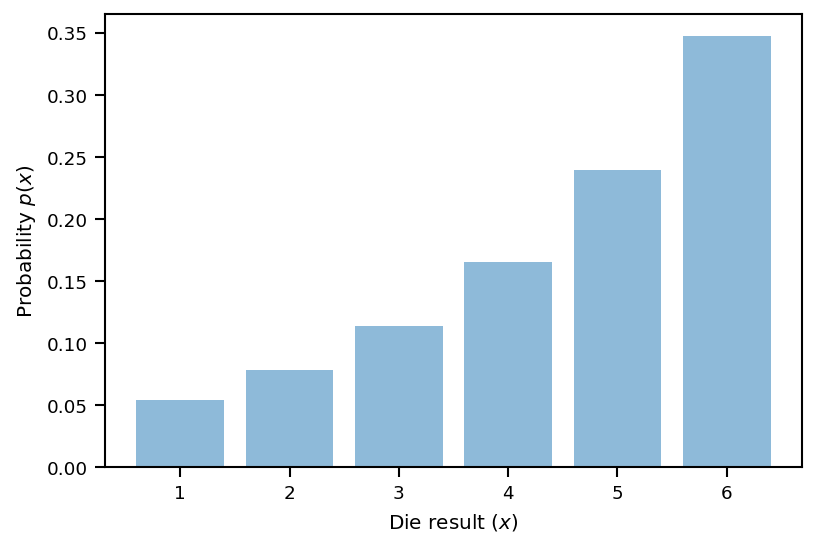

In [3]:
fig, ax = plt.subplots(dpi=150)
plt.bar(np.arange(1, 7), p, alpha=0.5)
ax.set_xlabel('Die result ($x$)')
ax.set_ylabel('Probability $p(x)$')

## Questions

+ Rerun the code above assuming that the mean is 3.5. What kind of distribution do you find? Why?
+ If you have some time to spare, modify the example above to add the constraint that the variance of $X$ should be 0.2. Hint: First, translate the constraint about the variance to a constraint about $\mathbb{E}[X^2]$. Second, you need to introduce one more parameter to optimize for. Call it $\mu$. The distribution would be $p(x) = \frac{\exp\{-\lambda x - \mu x^2\}}{Z(\lambda,\mu)}$. Then derive the set of non-linear equations you need solve to find $\lambda$ and $\mu$ by expanding these two equations:
$$
-\frac{\partial Z}{\partial \lambda} = \mathbb{E}[X],
$$
and
$$
-\frac{\partial Z}{\partial \mu} = \mathbb{E}[X^2].
$$
Finally, use [scipy.optimize.root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root) to solve the root-finding problem.
Be careful with this because it could take several hours to do right...